## Reading data using pandas

In [1]:
import pandas as pd

In [9]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [10]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [11]:
data.shape

(200, 4)

In [12]:
import seaborn as sns
%matplotlib inline

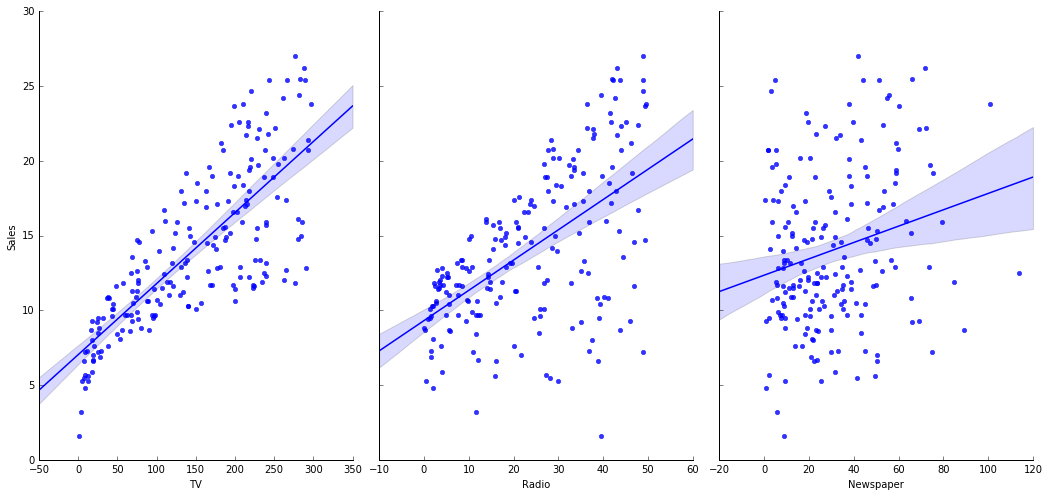

In [15]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size =7, aspect=0.7, kind='reg')

## Linear Regression

In [16]:
features_cols = ['TV', 'Radio', 'Newspaper']
X = data[features_cols]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [17]:
print type(X)
print X.shape

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [18]:
y = data['Sales']
y = data.Sales
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [19]:
print type(y)
print y.shape

<class 'pandas.core.series.Series'>
(200,)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [21]:
print X_test.shape
print X_train.shape
print y_test.shape
print y_train.shape

(50, 3)
(150, 3)
(50,)
(150,)


Linear Regression in scikit-learn

In [22]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
print linreg.intercept_
print linreg.coef_

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [24]:
# pair the feature names with the coefficients
zip(features_cols, linreg.coef_)

[('TV', 0.046564567874150295),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.0034504647111804343)]

In [25]:
y_pred = linreg.predict(X_test)

In [26]:
print y_pred

[ 21.70910292  16.41055243   7.60955058  17.80769552  18.6146359
  23.83573998  16.32488681  13.43225536   9.17173403  17.333853
  14.44479482   9.83511973  17.18797614  16.73086831  15.05529391
  15.61434433  12.42541574  17.17716376  11.08827566  18.00537501
   9.28438889  12.98458458   8.79950614  10.42382499  11.3846456
  14.98082512   9.78853268  19.39643187  18.18099936  17.12807566
  21.54670213  14.69809481  16.24641438  12.32114579  19.92422501
  15.32498602  13.88726522  10.03162255  20.93105915   7.44936831
   3.64695761   7.22020178   5.9962782   18.43381853   8.39408045
  14.08371047  15.02195699  20.35836418  20.57036347  19.60636679]


In [27]:
# Define true and predicted response value
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [28]:
print (10 + 0 + 20 + 10)/4
from sklearn import metrics
print metrics.mean_absolute_error(true, pred)

10
10.0


- Root mean Squared Error

In [29]:
print (10**2 + 0 + 20**2 + 10**2)/4
print metrics.mean_squared_error(true, pred)


150
150.0


In [30]:
# Calculate RMSE by hand
import numpy as np
print np.sqrt((10**2 + 0 + 20**2 + 10**2)/4)
print np.sqrt(metrics.mean_squared_error(true, pred))

12.2474487139
12.2474487139


- Computing the RMSE for our Sales predictions

In [31]:
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.40465142303


## Feature selection